In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
# Read the csv file into a pandas DataFrame
test = pd.read_csv('project-three/static/data/train_cleaned.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,54996,18096,128000,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,36000,0,66000,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,30996,28296,120000,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,72000,0,141000,360,1,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,65004,50352,267000,360,1,Urban,Y


In [3]:
# Assign the data to X and y

X = test["LoanAmount"].values.reshape(-1, 1)
y = test["ApplicantIncome"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (367, 1) (367, 1)


In [4]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [5]:
# Fit the model to the data. 

model.fit(X, y)

LinearRegression()

In [6]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[35.78174795]]
y-axis intercept:  [0.90043907]


In [7]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0]]
Max X Value: [[550]]


In [8]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)


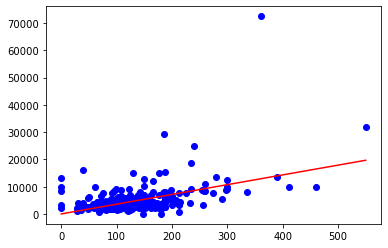

In [9]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")


Mean Squared Error (MSE): 8957173.698859548
R-squared (R2 ): 0.1026078946063741


In [12]:
# Call the `score` method on the model to show the r2 score

model.score(X_test, y_test)


0.1026078946063741

In [13]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.22382624723932654
Testing Score: 0.021028628967314722


Text(0.5, 1.0, 'Residual Plot')

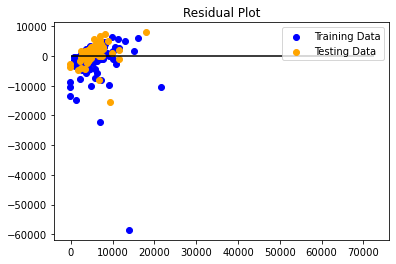

In [14]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [17]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

<ipython-input-18-e66d301628e6>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_scaled, y_train)
<ipython-input-18-e66d301628e6>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_scaled, y_train)
<ipython-input-18-e66d301628e6>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_scaled, y_train)
<ipython-input-18-e66d301628e6>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_scaled, y_train)
<ipython-input-18-e66d301628e6>:9: DataConversionWarning: A column-vector y was passed when a 1d

k: 1, Train/Test Score: 0.458/0.011
k: 3, Train/Test Score: 0.258/0.011
k: 5, Train/Test Score: 0.178/0.000
k: 7, Train/Test Score: 0.145/0.000
k: 9, Train/Test Score: 0.098/0.011
k: 11, Train/Test Score: 0.080/0.011
k: 13, Train/Test Score: 0.080/0.011
k: 15, Train/Test Score: 0.076/0.022
k: 17, Train/Test Score: 0.073/0.022
k: 19, Train/Test Score: 0.065/0.022


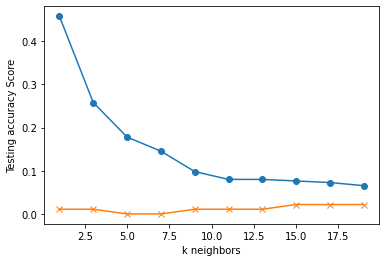

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()